**Data Science & Business Analytics intership**


**Task-1:Predict the percentage of an student based on the no. of study hours**


**By-Abhijeet Suresh Shinde Data Science & Business Analytics intern at The Sparks Foundation (TSF)**

In [281]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
url="https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv"
df=pd.read_csv(url)

In [282]:
#checking head of data
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


**we can see there is two column Hours and scores**

In [283]:
#lets check missing,null values in data
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [284]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


**no null values in this data**

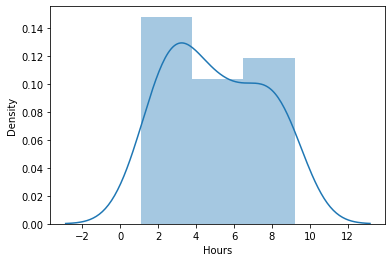

Hours 0.1787220638918746


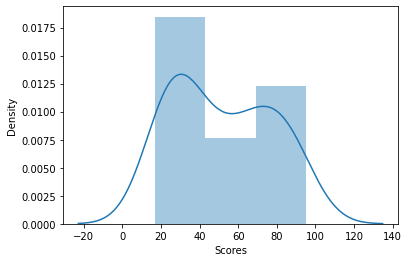

Scores 0.21968605283072445


In [285]:
#lets find skewness in this data
from scipy.stats import skew
for col in df:
  plt.figure()
  sns.distplot(df[col])
  plt.show()
  print(col, skew(df[col]))

**we can see from fig littile skewness in bolth column but we can ignore it because it dosent affect**

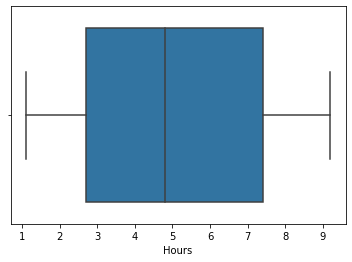

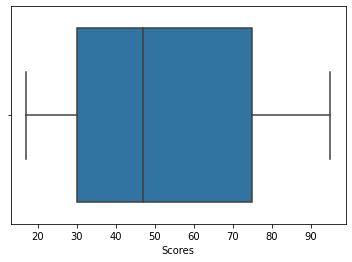

In [286]:
#lets check the outliers in data
for col in df:
  plt.figure()
  sns.boxplot(df[col])
  plt.show()

**from fig we can see there is no any outliers in data**

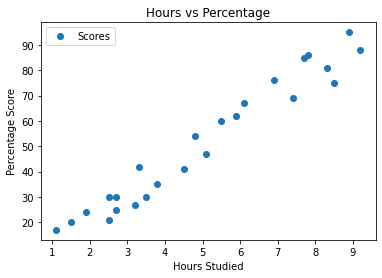

In [287]:
# Plotting the distribution of scores
df.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

**From the graph above, we can clearly see that there is a positive linear relation between the number of hours studied and percentage of score.**

**Preparing the data**

In [288]:
#modeling
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


In [289]:
X = df.drop("Scores",axis=1)
y = df["Scores"]

In [290]:
X

,Hours
0,2.5
1,5.1
2,3.2
3,8.5
4,3.5
5,1.5
6,9.2
7,5.5
8,8.3
9,2.7


In [291]:
y

0     21
1     47
2     27
3     75
4     30
5     20
6     88
7     60
8     81
9     25
10    85
11    62
12    41
13    42
14    17
15    95
16    30
17    24
18    67
19    69
20    30
21    54
22    35
23    76
24    86
Name: Scores, dtype: int64

In [292]:
 
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3, random_state=50)

### **Training the Algorithm**
We have split our data into training and testing sets, and now is finally the time to train our algorithm.

In [293]:
#base line model with linear regression
lr=LinearRegression()
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [294]:
y_pred = lr.predict(X_test)

In [295]:
# Comparing Actual vs Predicted
df_com = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df_com

,Actual,Predicted
15,95,88.526602
20,30,29.492644
23,76,69.483390
22,35,39.966411
14,17,14.258075
12,41,46.631535
8,81,82.813638
9,25,29.492644


In [296]:
# You can also test with your own data
hours = 9.25
own_pred = lr.predict([[hours]])
print("The predicted score if a person studies for",hours,"hours is",own_pred[0])

The predicted score if a person studies for 9.25 hours is 91.85916414718679


**Hence, it can be concluded that the predicted score if a person studies for 9.25 hours is 91.85916414718679**

**In the last step, we are going to evaluate our trained model by calculating mean absolute error and r2 score**

In [297]:
mse = mean_squared_error(y_test,y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test,y_pred)


print("mse =",mse)
print("r2 =",r2)
print("mae =",mae)

mse = 21.499902390056103
r2 = 0.9717199573955198
mae = 4.142939772140698


**Hence r2 score is very close to 1 so we can say that our model preduction is very acurate**